In [1]:
import pandas as pd

# --- Load data ---
excel_file = r"/Users/Maider/Desktop/Python EXCEL data.xlsx"
df = pd.read_excel(excel_file)
print(df.head())

# --- Separate metadata and features ---
meta_cols = ['Molecule ChEMBL ID', 'SMILES']
meta_df = df[meta_cols].copy()
features_df = df.drop(columns=meta_cols).copy()

print("\nMetadata dataframe:")
print(meta_df.head())
print("\nFeatures dataframe:")
print(features_df.head())

  Molecule ChEMBL ID                                             SMILES  \
0       CHEMBL608533  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   
1       CHEMBL608533  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   
2       CHEMBL608533  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   
3       CHEMBL608533  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   
4       CHEMBL608533  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   

   f(vij)obj  f(vij)ref  ΔD(drug,assay)1  ΔD(drug,assay)2  ΔD(drug,assay)3  \
0          0   0.695298        45.111861         1.816456         2.309243   
1          0   0.695298        45.451262         1.817035         2.309243   
2          0   0.695298        30.638265         1.817035         2.309243   
3          0   0.695298        45.451262         1.817035         2.309243   
4          0   0.695298        45.111861         1.816456         2.309243   

   ΔV(drug,assay)1  ΔV(drug,assay)2  ΔD(drug,assay)001  ...  \
0         4.51419

In [2]:
from sklearn.feature_selection import VarianceThreshold

# --- Variance filtering ---
var_threshold = 0.01
selector = VarianceThreshold(threshold=var_threshold)
features_high_variance = selector.fit_transform(features_df)
selected_features = features_df.columns[selector.get_support()]
features_df = pd.DataFrame(features_high_variance, columns=selected_features)

print(f"Remaining columns after variance filter: {features_df.columns}")


Remaining columns after variance filter: Index(['f(vij)obj', 'f(vij)ref', 'ΔD(drug,assay)1', 'ΔD(drug,assay)2',
       'ΔD(drug,assay)3', 'ΔV(drug,assay)1', 'ΔV(drug,assay)2',
       'ΔD(drug,assay)001', 'ΔD(drug,assay)002', 'ΔD(drug,assay)003',
       ...
       'ΔD(prot,domII,dat)1', 'ΔD(prot,domII,dat)2', 'ΔD(prot,domII,dat)3',
       'ΔD(prot,domII,dat)4', 'ΔD(prot,domII,dat)5', 'ΔD(prot,domIII,dat)1',
       'ΔD(prot,domIII,dat)2', 'ΔD(prot,domIII,dat)3', 'ΔD(prot,domIII,dat)4',
       'ΔD(prot,domIII,dat)5'],
      dtype='object', length=240)


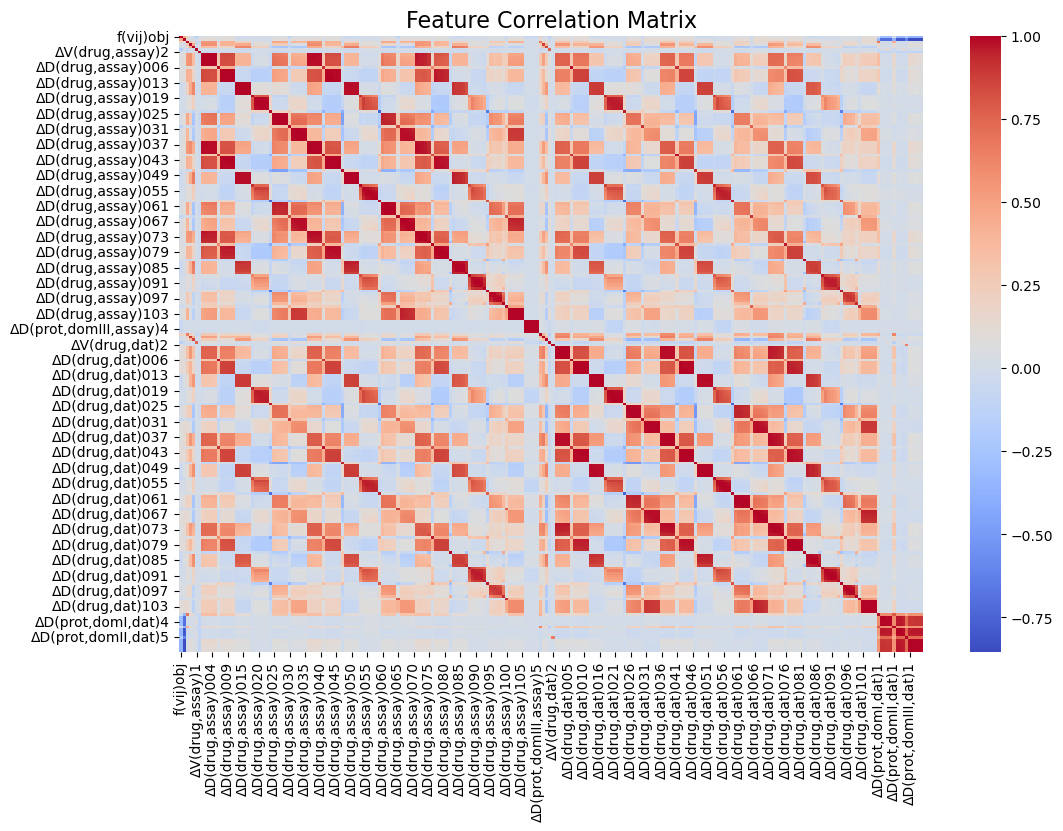

Remaining columns after correlation filter: Index(['f(vij)obj', 'f(vij)ref', 'ΔD(drug,assay)1', 'ΔD(drug,assay)2',
       'ΔD(drug,assay)3', 'ΔV(drug,assay)1', 'ΔV(drug,assay)2',
       'ΔD(drug,assay)001', 'ΔD(drug,assay)006', 'ΔD(drug,assay)007',
       'ΔD(drug,assay)013', 'ΔD(drug,assay)018', 'ΔD(drug,assay)019',
       'ΔD(drug,assay)024', 'ΔD(drug,assay)025', 'ΔD(drug,assay)030',
       'ΔD(drug,assay)031', 'ΔD(drug,assay)041', 'ΔD(drug,assay)047',
       'ΔD(drug,assay)053', 'ΔD(drug,assay)054', 'ΔD(drug,assay)059',
       'ΔD(drug,assay)060', 'ΔD(drug,assay)065', 'ΔD(drug,assay)076',
       'ΔD(drug,assay)082', 'ΔD(drug,assay)083', 'ΔD(drug,assay)087',
       'ΔD(drug,assay)088', 'ΔD(drug,assay)089', 'ΔD(drug,assay)093',
       'ΔD(drug,assay)094', 'ΔD(drug,assay)095', 'ΔD(drug,assay)099',
       'ΔD(drug,assay)100', 'ΔD(drug,assay)101', 'ΔD(prot,domIII,assay)1',
       'ΔD(drug,dat)1', 'ΔD(drug,dat)2', 'ΔD(drug,dat)3', 'ΔV(drug,dat)1',
       'ΔV(drug,dat)2', 'ΔD(drug,dat)001'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Correlation matrix ---
correlation_matrix = features_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

# --- Remove highly correlated features ---
threshold = 0.97
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix.columns[i])

features_df = features_df.drop(columns=correlated_features)
print(f"Remaining columns after correlation filter: {features_df.columns}")


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Scale features ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# --- K-Means clustering ---
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# --- Cluster distribution ---
print("Cluster distribution:")
print(df['Cluster'].value_counts())


Cluster distribution:
Cluster
2    918
4    891
1    711
3    642
0    586
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

train_list = []
test_list = []

for cluster in df['Cluster'].unique():
    cluster_df = df[df['Cluster'] == cluster]
    train_cluster, test_cluster = train_test_split(cluster_df, test_size=0.2, random_state=42)
    train_list.append(train_cluster)
    test_list.append(test_cluster)

train_df = pd.concat(train_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

# --- Save files ---
train_path = r"/Users/Maider/Desktop/train_df.csv"
test_path  = r"/Users/Maider/Desktop/test_df.csv"
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"Train set saved at: {train_path}")
print(f"Test set saved at: {test_path}")


Train set saved at: /Users/Maider/Desktop/train_df.csv
Test set saved at: /Users/Maider/Desktop/test_df.csv
